# Problem Statement:
Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively

In [1]:
# Importing Pandas,NumPy, Matplotlib, Seaborn and Warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all the datasets:
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
# Merging churn_data and customer_data on "customerID" using inner join on customerID
df_1 = pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [4]:
# Final dataframe with all predictor variables (merging df_1 and internet_data on "customer_ID")
df = pd.merge(df_1,internet_data,how="inner",on="customerID")

# Lets understand the structure of our dataframe

In [5]:
# Lets understand the structure of our dataframe
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
# Lets check the statistical description for our master data;
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Lets see the type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [8]:
df.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [9]:
# As "customerID" contain all the unique elements so it is not so important for the model building purpose.
df  = df.drop(["customerID"],axis=1)

In [10]:
df

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('********************************')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
********************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
********************************
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
********************************
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
********************************
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
********************************
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64
********************************
          11
20.2      11
19.75      9
20.05      8
19.9       8
          

# Data Preparation

In [12]:
# Converting Yes to 1 and No to 0 using map:
df["PhoneService"] = df["PhoneService"].map({"Yes":1,"No":0})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes":1,"No":0})
df["Churn"] = df["Churn"].map({"Yes":1,"No":0})
df["Partner"] = df["Partner"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"Yes":1,"No":0})

In [13]:
df

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,0,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,0,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0,1,1,No phone service,DSL,Yes,No,No,No,No,No
7041,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,1,1,0,Yes,Fiber optic,No,No,No,No,No,No


In [14]:
# As there are many more categorical columns which are to be changed to numerical columns;
# Seperating categorical and numerical columns:
catcol=[]
numcol=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
    else:
        numcol.append(i)

In [15]:
catcol

['Contract',
 'PaymentMethod',
 'TotalCharges',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [16]:
numcol

['tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'Churn',
 'SeniorCitizen',
 'Partner',
 'Dependents']

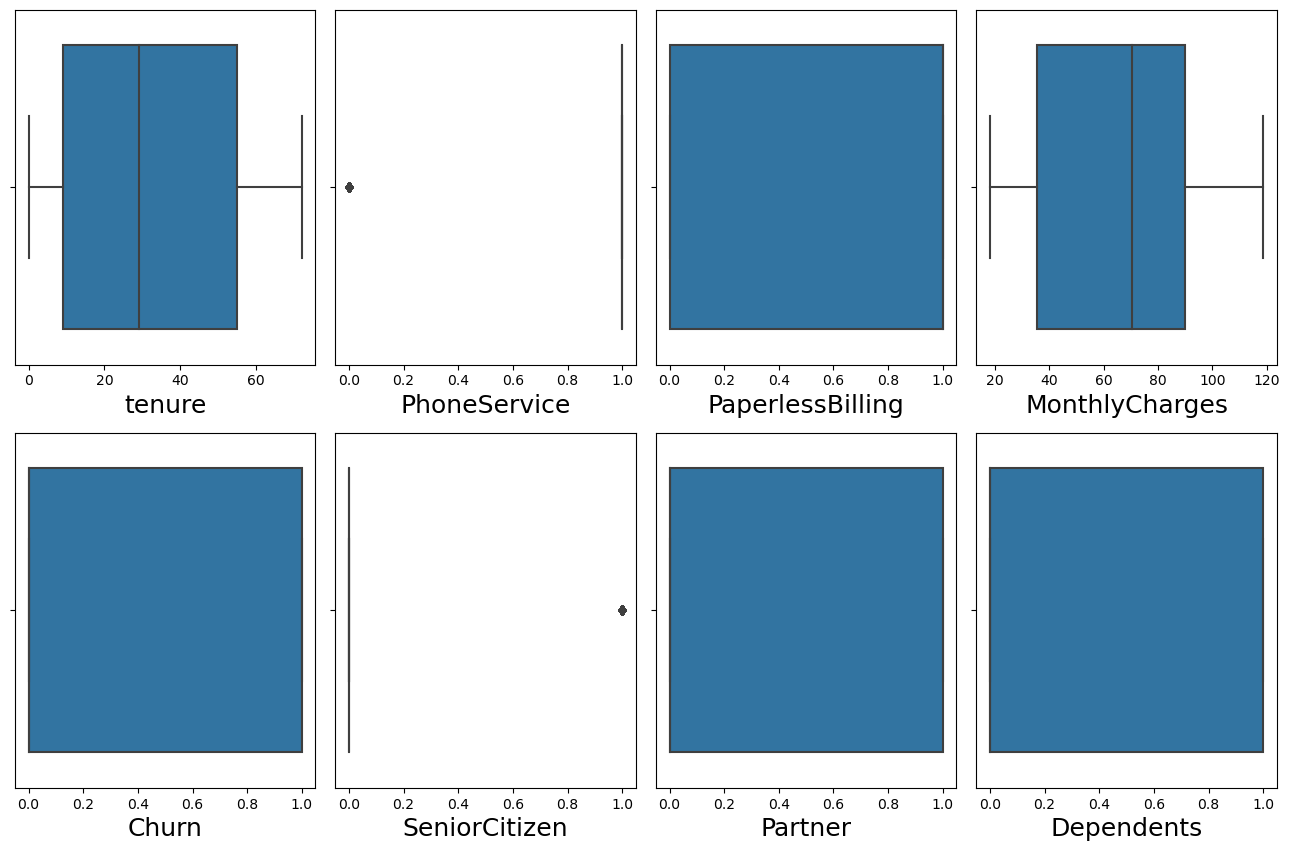

In [17]:
# Checking outliers for numerical columns through boxplot:
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
        pltn=pltn+1
    plt.tight_layout()

In [18]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[numcol].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,0.265370,0.162147,0.483033,0.299588
std,24.559481,0.295752,0.491457,30.090047,0.441561,0.368612,0.499748,0.458110
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,1.000000,0.000000,1.000000,1.000000
90%,69.000000,1.000000,1.000000,102.600000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.400000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,1.000000,1.000000,1.000000,1.000000


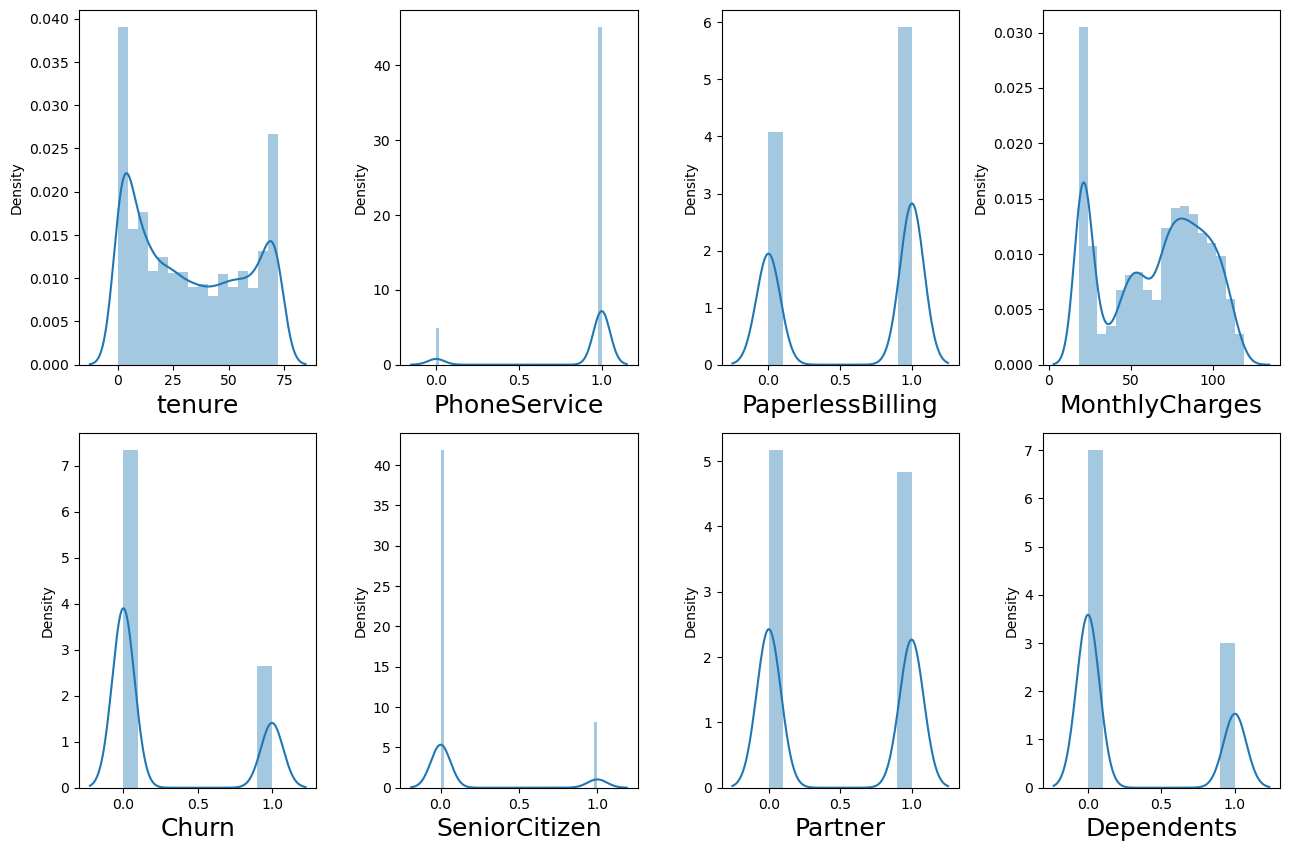

In [19]:
# Checking skewness for numerical columns through distplot
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=14:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
        pltn=pltn+1
    plt.tight_layout()

In [20]:
df.skew()

tenure              0.239540
PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
Churn               1.063031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
dtype: float64

In [21]:
# Changing the Categorical column to Numerical Column:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol] = oe.fit_transform(df[catcol])

In [22]:
df

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,0.0,1,2.0,29.85,2505.0,0,0.0,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,34,1,1.0,0,3.0,56.95,1466.0,0,1.0,0,0,0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
2,2,1,0.0,1,3.0,53.85,157.0,1,1.0,0,0,0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
3,45,0,1.0,0,0.0,42.30,1400.0,0,1.0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0
4,2,1,0.0,1,2.0,70.70,925.0,1,0.0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1.0,1,3.0,84.80,1597.0,0,1.0,0,1,1,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0
7039,72,1,1.0,1,1.0,103.20,5698.0,0,0.0,0,1,1,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0
7040,11,0,0.0,1,2.0,29.60,2994.0,0,0.0,0,1,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7041,4,1,0.0,1,3.0,74.40,2660.0,1,1.0,1,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Standardization

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int64  
 2   Contract          7043 non-null   float64
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   float64
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   float64
 7   Churn             7043 non-null   int64  
 8   gender            7043 non-null   float64
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int64  
 11  Dependents        7043 non-null   int64  
 12  MultipleLines     7043 non-null   float64
 13  InternetService   7043 non-null   float64
 14  OnlineSecurity    7043 non-null   float64
 15  OnlineBackup      7043 non-null   float64
 16  DeviceProtection  7043 non-null   float64


In [24]:
# Getting all desired continues variables like "tenure", "MonthlyCharges" and "TotalCharges" into one dataframe.
df_2 = df[["tenure","MonthlyCharges","TotalCharges"]]

In [25]:
# Standardization above continous features
std_df  = (df_2-df_2.mean())/df_2.std()

In [26]:
# Dropping "tenure","MonthlyCharges" and "TotalCharges" from df as we want to add the standardized features
df = df.drop(["tenure","MonthlyCharges","TotalCharges"],axis=1)

In [27]:
# Add std_df into df
df = pd.concat([df,std_df],axis=1)

In [28]:
# print df tail
df.tail()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges
7038,1,1.0,1,3.0,0,1.0,0,1,1,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,-0.340852,0.665945,-0.879335
7039,1,1.0,1,1.0,0,0.0,0,1,1,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.613587,1.277443,1.292007
7040,0,0.0,1,2.0,0,0.0,0,1,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.870179,-1.168549,-0.139670
7041,1,0.0,1,3.0,1,1.0,1,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.155201,0.320315,-0.316512
7042,1,2.0,1,0.0,0,1.0,0,0,0,0.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,1.369282,1.358865,1.137933


# Checking the churn rate:

In [29]:
# Calculating toal churn rate percentage in our master dataframe
churn = (sum(df["Churn"])/len(df["Churn"].index))*100
print(churn)

26.536987079369588


# Model Building

In [30]:
# Putting features in x and target in y respectively:
x  = df.drop(["Churn"],axis=1)
y = df["Churn"]

In [31]:
x

,PhoneService,Contract,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,MonthlyCharges,TotalCharges
0,0,0.0,1,2.0,0.0,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.277354,-1.160241,-0.398579
1,1,1.0,0,3.0,1.0,0,0,0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.066323,-0.259611,-0.948695
2,1,0.0,1,3.0,1.0,0,0,0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,-1.236636,-0.362635,-1.641767
3,0,1.0,0,0.0,1.0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.514215,-0.746482,-0.983640
4,1,0.0,1,2.0,0.0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.236636,0.197351,-1.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1.0,1,3.0,1.0,0,1,1,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,-0.340852,0.665945,-0.879335
7039,1,1.0,1,1.0,0.0,0,1,1,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.613587,1.277443,1.292007
7040,0,0.0,1,2.0,0.0,0,1,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.870179,-1.168549,-0.139670
7041,1,0.0,1,3.0,1.0,1,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.155201,0.320315,-0.316512


In [32]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [33]:
# import statsmodels api as sm
import statsmodels.api as sm

In [34]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [35]:
# adding constant to x
x = sm.add_constant(x)

#Splitting the data into train and test with train_size=0.7 and test_size=0.3 with random_state=100
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
# Logistic Regression Model:
logm1 = sm.Logit(ytrain,xtrain)
logm1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.409864
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4910
Method:                           MLE   Df Model:                           19
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2903
Time:                        14:10:36   Log-Likelihood:                -2020.6
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2217      0.211     -1.050      0.294      -0.635       0.192
PhoneService        -0.9714      0.172     -5.635      0.000      -1.309      -0.634
Contract            -0.7138      0.091     -7.803      0.000      -0.893      -0.535
PaperlessBilling     0.3569      0.090      3.980      0.000       0.181       0.533
PaymentMethod        0.0499      0.042      1.175      0.240      -0.033       0.133
gender              -0.0402      0.078     -0.514      0.607      -0.194       0.113
SeniorCitizen        0.3199      0.102      3.125      0.002       0.119       0.521
Partner              0.0462      0.094      0.494      0.621      -0.137       0.230
Dependents          -0.2364      0.107     -2.204      0.028      -0.447      -0.026
MultipleLines        0.1123      0.049      2.298      0.022       0.017       0.208
InternetService      0.2546      0.078      3.257      0.001       0.101       0.408
OnlineSecurity      -0.2077      0.050     -4.172      0.000      -0.305      -0.110
OnlineBackup        -0.1777      0.046     -3.888      0.000      -0.267      -0.088
DeviceProtection    -0.0764      0.047     -1.611      0.107      -0.169       0.017
TechSupport         -0.3109      0.051     -6.088      0.000      -0.411      -0.211
StreamingTV          0.0017      0.049      0.034      0.973      -0.095       0.098
StreamingMovies     -0.0152      0.049     -0.308      0.758      -0.112       0.081
tenure              -0.8434      0.070    -12.056      0.000      -0.981      -0.706
MonthlyCharges       0.8412      0.069     12.218      0.000       0.706       0.976
TotalCharges         0.0933      0.041      2.291      0.022       0.013       0.173
====================================================================================
"""

In [37]:
x.drop(["PaymentMethod","gender","Partner","DeviceProtection","StreamingTV","StreamingMovies"],axis=1,inplace=True)

# Correlation Matrix

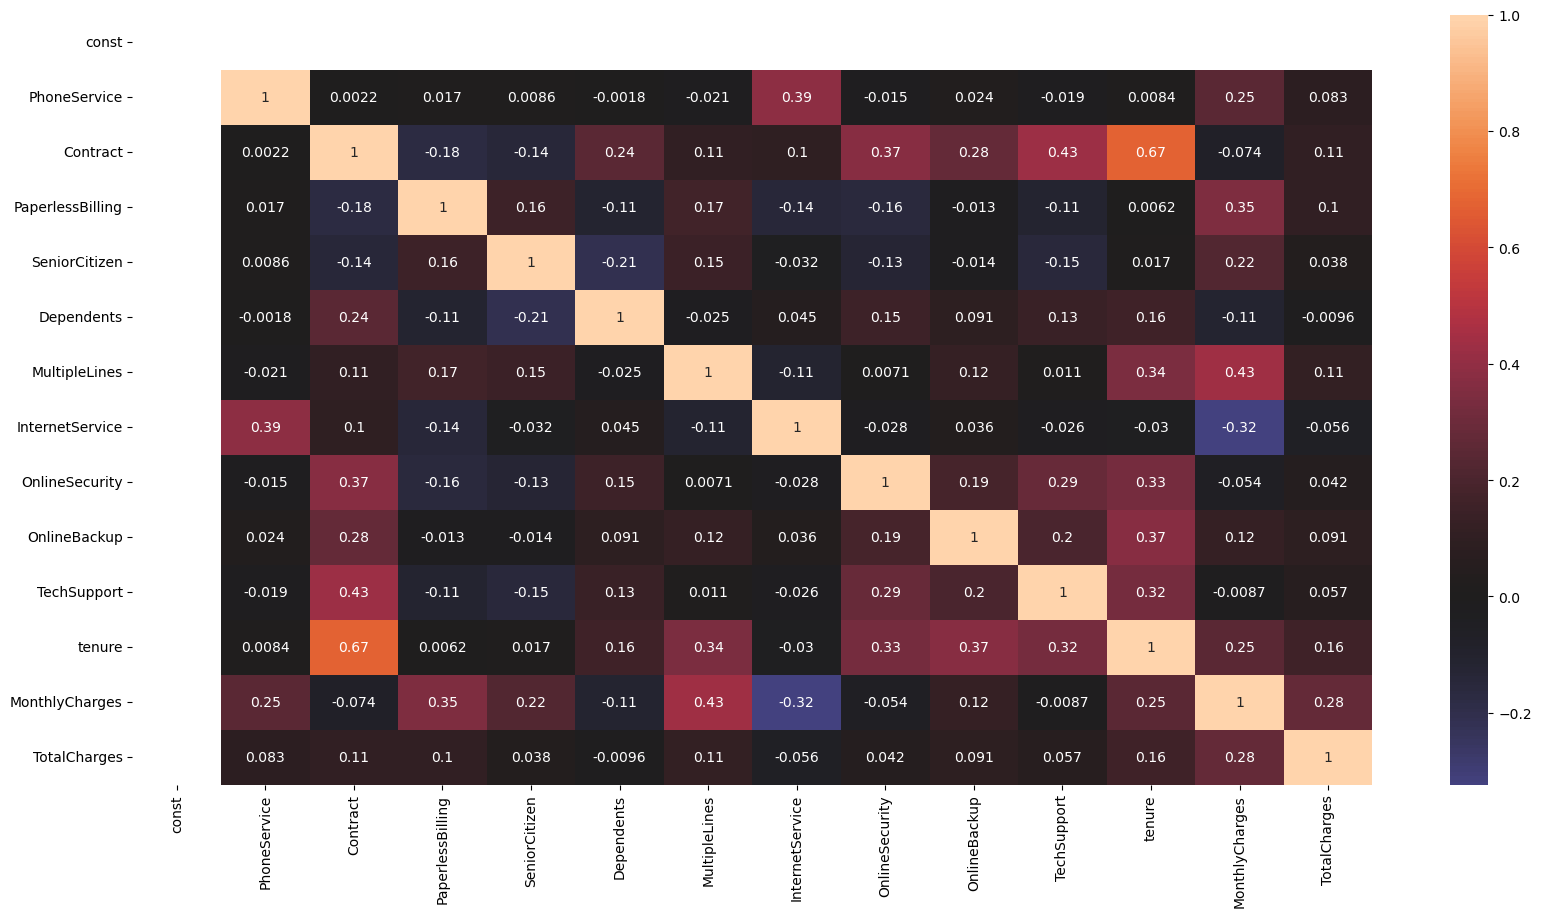

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot = True, center=0)
plt.show()

# Dropping highly correlated variables

In [39]:
# Write a correlation function to drop correlation to remove highly correlated variables (>70%)
def correlation(dataset,threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(x,0.70)
len(set(corr_features))

0

# Dropping highly correlated variables with VIF

In [41]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# empty dataframe
vif = pd.DataFrame()
# variables names with all variables in column x
vif["variables"] = x.columns
# VIF scores for corresponding features
vif["VIF"] = [round(variance_inflation_factor(x.values,i),2)for i in range(x.shape[1])]

In [42]:
# print vif
vif.sort_values(by="VIF")

,variables,VIF
5,Dependents,1.11
13,TotalCharges,1.11
4,SeniorCitizen,1.14
9,OnlineBackup,1.18
3,PaperlessBilling,1.20
8,OnlineSecurity,1.24
10,TechSupport,1.28
6,MultipleLines,1.38
1,PhoneService,1.52
7,InternetService,1.58


# Re-running the model:

In [43]:
#Splitting the data into train and test with train_size=0.7 and test_size=0.3 with random_state=100
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
logm2 = sm.Logit(ytrain,xtrain)
logm2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.410334
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2895
Time:                        14:10:37   Log-Likelihood:                -2022.9
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2325      0.177     -1.311      0.190      -0.580       0.115
PhoneService        -0.9334      0.166     -5.639      0.000      -1.258      -0.609
Contract            -0.7373      0.090     -8.170      0.000      -0.914      -0.560
PaperlessBilling     0.3617      0.089      4.045      0.000       0.186       0.537
SeniorCitizen        0.3278      0.102      3.228      0.001       0.129       0.527
Dependents          -0.2161      0.098     -2.214      0.027      -0.407      -0.025
MultipleLines        0.1164      0.049      2.393      0.017       0.021       0.212
InternetService      0.2348      0.074      3.161      0.002       0.089       0.380
OnlineSecurity      -0.2072      0.050     -4.166      0.000      -0.305      -0.110
OnlineBackup        -0.1787      0.046     -3.914      0.000      -0.268      -0.089
TechSupport         -0.3203      0.051     -6.334      0.000      -0.419      -0.221
tenure              -0.8677      0.067    -12.960      0.000      -0.999      -0.736
MonthlyCharges       0.8160      0.062     13.187      0.000       0.695       0.937
TotalCharges         0.0956      0.041      2.353      0.019       0.016       0.175
====================================================================================
"""

# Another method of feature selection using Recurssive Feature Elimination (RFE):

In [44]:
# importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initiate LogisticRegression();
logreg = LogisticRegression()

# Initialize RFE
rfe = RFE(logreg)

# fitting  RFE
rfe = rfe.fit(x,y)

# Printing the boolean results
print(rfe.support_)

# Printing the rankning
print(rfe.ranking_)

[False  True  True  True  True False False False  True False False  True
  True False]
[8 1 1 1 1 4 7 3 1 5 2 1 1 6]


In [45]:
# printing column names which were supported by RFE
x.columns[(rfe.support_)]

Index(['PhoneService', 'Contract', 'PaperlessBilling', 'SeniorCitizen',
       'OnlineSecurity', 'tenure', 'MonthlyCharges'],
      dtype='object')

In [46]:
# variables selected by RFE
col = ['PhoneService', 'Contract', 'PaperlessBilling', 'SeniorCitizen',
       'OnlineSecurity', 'tenure', 'MonthlyCharges']

In [47]:
# recreating the model with statsmodels with RFE select columns:
logm3 = sm.Logit(ytrain,xtrain[col])
logm3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.420343
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4923
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.2721
Time:                        14:10:37   Log-Likelihood:                -2072.3
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PhoneService        -1.1142      0.086    -12.942      0.000      -1.283      -0.946
Contract            -0.9367      0.085    -11.048      0.000      -1.103      -0.770
PaperlessBilling     0.2802      0.077      3.626      0.000       0.129       0.432
SeniorCitizen        0.3987      0.096      4.159      0.000       0.211       0.587
OnlineSecurity      -0.2904      0.047     -6.140      0.000      -0.383      -0.198
tenure              -0.8767      0.061    -14.452      0.000      -0.996      -0.758
MonthlyCharges       0.9093      0.056     16.361      0.000       0.800       1.018
====================================================================================
"""

In [48]:
# Let's run the model using the selected variables but this time we will use LogisticRegression
# from sklearn import metrics

# initialize LogisticRegression
logsk = LogisticRegression()

# fitting model using above columns as input
logsk.fit(xtrain[col],ytrain)

LogisticRegression()

In [49]:
# Predicted probabilities
y_pred = logsk.predict_proba(xtest[col])

In [50]:
# converting y_pred to a dataframe which is an array
y_pred_df  = pd.DataFrame(y_pred)

In [51]:
# Converting to column dataframe
y_pred_1  = y_pred_df.iloc[:,[1]]

In [52]:
y_pred_1.head()

,1
0,0.005899
1,0.002580
2,0.025441
3,0.006517
4,0.136702


In [53]:
# Converting the y_test to DataFrame:
ytest_df = pd.DataFrame(ytest)

In [54]:
# Putting CustID to index
ytest_df["Cust_id"] = ytest_df.index

In [55]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
ytest_df.reset_index(drop=True,inplace=True)

In [56]:
# Appending ytest_df and y_pred_1
y_pred_final = pd.concat([ytest_df,y_pred_1],axis=1)

In [57]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={1:"Churn_Probab"})

In [58]:
y_pred_final

,Churn,Cust_id,Churn_Probab
0,0,4880,0.005899
1,0,1541,0.002580
2,0,1289,0.025441
3,0,5745,0.006517
4,0,4873,0.136702
...,...,...,...
2108,1,1285,0.778970
2109,0,5092,0.140569
2110,0,5837,0.568534
2111,0,3597,0.577809


In [59]:
# Rearranging the columns for better understanding
y_pred_final = y_pred_final.reindex(columns=["Cust_id","Churn","Churn_Probab"])

In [60]:
y_pred_final.head()

,Cust_id,Churn,Churn_Probab
0,4880,0,0.005899
1,1541,0,0.002580
2,1289,0,0.025441
3,5745,0,0.006517
4,4873,0,0.136702


In [61]:
# Creating new column "predicted" with 1 if "Churn_Probab" > 0.5 else 0
y_pred_final["predicted"] = y_pred_final.Churn_Probab.map(lambda x: 1 if x>0.5 else 0)

In [62]:
y_pred_final

,Cust_id,Churn,Churn_Probab,predicted
0,4880,0,0.005899,0
1,1541,0,0.002580,0
2,1289,0,0.025441,0
3,5745,0,0.006517,0
4,4873,0,0.136702,0
...,...,...,...,...
2108,1285,1,0.778970,1
2109,5092,0,0.140569,0
2110,5837,0,0.568534,1
2111,3597,0,0.577809,1


# Model Evaluation

In [63]:
# import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)
cr=classification_report(y_pred_final.Churn,y_pred_final.predicted)
ac=accuracy_score(y_pred_final.Churn,y_pred_final.predicted)

In [64]:
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[1374  173]
 [ 273  293]]
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1547
           1       0.63      0.52      0.57       566

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

 Accuracy0.7889256980596309


# ROC Curve

In [65]:
from sklearn import metrics

In [66]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

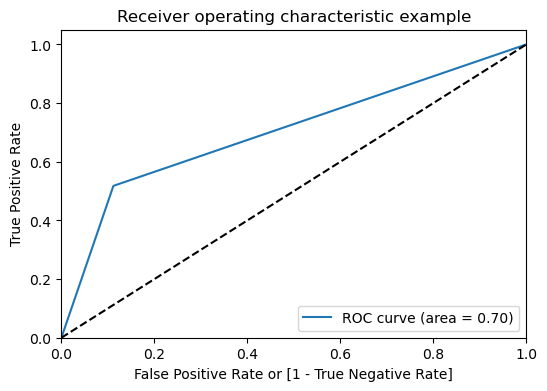

(array([0.        , 0.11182935, 1.        ]),
 array([0.        , 0.51766784, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [67]:
# Using above function to plot ROC curve
draw_roc(y_pred_final.Churn,y_pred_final.predicted)

# Finding Optimal CutOff

In [68]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different probability cut off
for i in numbers:
    y_pred_final[i] = y_pred_final.Churn_Probab.map(lambda x:1 if x>i else 0)
    
# print y_pred_final
print(y_pred_final)

      Cust_id  Churn  Churn_Probab  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        4880      0      0.005899          0    1    0    0    0    0    0   
1        1541      0      0.002580          0    1    0    0    0    0    0   
2        1289      0      0.025441          0    1    0    0    0    0    0   
3        5745      0      0.006517          0    1    0    0    0    0    0   
4        4873      0      0.136702          0    1    1    0    0    0    0   
...       ...    ...           ...        ...  ...  ...  ...  ...  ...  ...   
2108     1285      1      0.778970          1    1    1    1    1    1    1   
2109     5092      0      0.140569          0    1    1    0    0    0    0   
2110     5837      0      0.568534          1    1    1    1    1    1    1   
2111     3597      0      0.577809          1    1    1    1    1    1    1   
2112     3625      0      0.002676          0    1    0    0    0    0    0   

      0.6  0.7  0.8  0.9  
0       0    0    0    0

In [69]:
# Create an empty dataframe with columns "prob", "accuracy", "sensi", and "speci"
cutoff_df = pd.DataFrame(columns=["prob", "accuracy", "sensi", "speci"])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate through num
for i in num:
    # Calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i])
    
    # Total in cm1
    total = sum(sum(cm1))
    
    # Calculate accuracy
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total
    
    # Calculate specificity
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    
    # Calculate sensitivity
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # Append rows in cutoff_df with cutoff values, accuracy, sensitivity, and specificity
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
# print cutoff_df
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.267866  1.000000  0.000000
0.1   0.1  0.595362  0.957597  0.462831
0.2   0.2  0.681969  0.855124  0.618617
0.3   0.3  0.727875  0.768551  0.712993
0.4   0.4  0.769049  0.655477  0.810601
0.5   0.5  0.788926  0.517668  0.888171
0.6   0.6  0.785140  0.349823  0.944409
0.7   0.7  0.760057  0.148410  0.983840
0.8   0.8  0.737340  0.019435  1.000000
0.9   0.9  0.732134  0.000000  1.000000


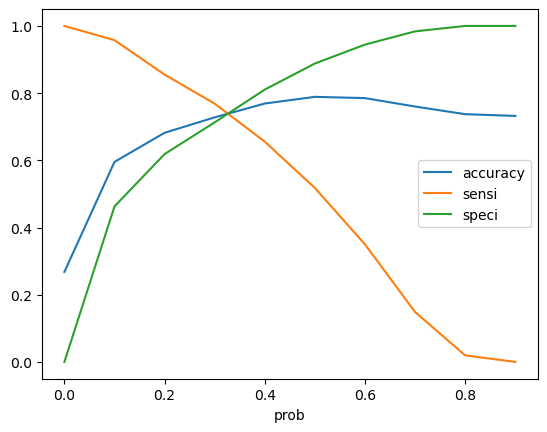

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x="prob",y=["accuracy","sensi","speci"])
plt.show()

In [71]:
# Adding another column with final_predicted whch has 0.3 cutoff probability
y_pred_final["final_predicted"] = y_pred_final.Churn_Probab.map(lambda x:1 if x>0.4 else 0)

In [72]:
y_pred_final

,Cust_id,Churn,Churn_Probab,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,4880,0,0.005899,0,1,0,0,0,0,0,0,0,0,0,0
1,1541,0,0.002580,0,1,0,0,0,0,0,0,0,0,0,0
2,1289,0,0.025441,0,1,0,0,0,0,0,0,0,0,0,0
3,5745,0,0.006517,0,1,0,0,0,0,0,0,0,0,0,0
4,4873,0,0.136702,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,1285,1,0.778970,1,1,1,1,1,1,1,1,1,0,0,1
2109,5092,0,0.140569,0,1,1,0,0,0,0,0,0,0,0,0
2110,5837,0,0.568534,1,1,1,1,1,1,1,0,0,0,0,1
2111,3597,0,0.577809,1,1,1,1,1,1,1,0,0,0,0,1


In [73]:
# Checking the overall accuracy now again
cm=confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
cr=classification_report(y_pred_final.Churn,y_pred_final.final_predicted)
ac=accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

In [74]:
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[1254  293]
 [ 195  371]]
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1547
           1       0.56      0.66      0.60       566

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113

 Accuracy0.7690487458589683


# Trying using all the features available before doing RFE; i.e. consider all features in x

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

In [77]:
logsk2 = LogisticRegression()
logsk2.fit(xtrain,ytrain)
ypred = logsk2.predict(xtest)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)

In [79]:
print(f'{cm}\n {cr}\n Accuracy{ac}')

[[1373  174]
 [ 272  294]]
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1547
           1       0.63      0.52      0.57       566

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

 Accuracy0.7889256980596309


# Summary: